In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv('D:/netflix_dataset/netflix_customer_churn.csv')
print(data.head(10))

                            customer_id  age  gender subscription_type  \
0  a9b75100-82a8-427a-a208-72f24052884a   51   Other             Basic   
1  49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b   47   Other          Standard   
2  4d71f6ce-fca9-4ff7-8afa-197ac24de14b   27  Female          Standard   
3  d3c72c38-631b-4f9e-8a0e-de103cad1a7d   53   Other           Premium   
4  4e265c34-103a-4dbb-9553-76c9aa47e946   56   Other          Standard   
5  d8079475-5be7-47e9-8782-ceb7ff61395e   58  Female          Standard   
6  8e63450a-13d6-4e83-bbb5-6aebde9152cb   48   Other             Basic   
7  02387681-8c42-462a-807a-de0168c73b38   51    Male             Basic   
8  0bcaad0c-545c-4ee1-85a6-75e165f39361   45   Other             Basic   
9  eae6439e-8cdf-4258-ab49-c493925b927a   32   Other           Premium   

   watch_hours  last_login_days   region  device  monthly_fee  churned  \
0        14.73               29   Africa      TV         8.99        1   
1         0.70               19   Eur

In [3]:
print(data.isnull().sum())

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

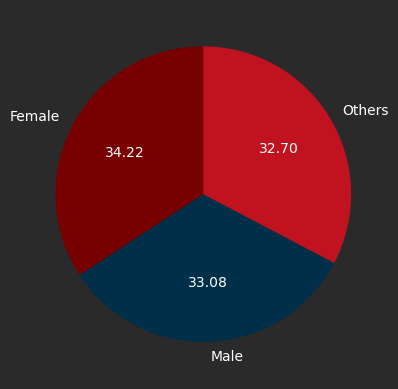

In [3]:
gp= data.groupby('gender')['customer_id'].count()

color=['#780000', '#003049','#C1121F', '#FDF0D5',  '#669BBC']
fig, ax = plt.subplots()

ax.pie(x=gp ,labels=['Female' , 'Male' , 'Others'], autopct='%.2f',startangle=90,colors=color,textprops={'color':'white'})
fig.patch.set_facecolor('#2a2a2a')   
ax.set_facecolor('#2a2a2a')
sns.despine()
plt.savefig('gender_dist.png')
plt.show()

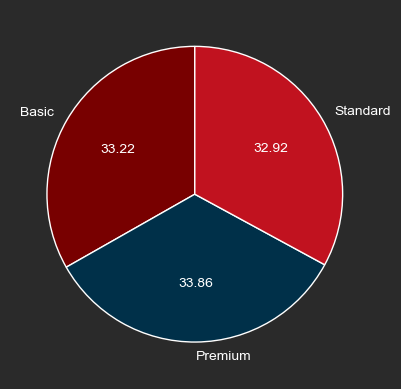

In [108]:
gp1= data.groupby('subscription_type')['customer_id'].count()

fig, ax = plt.subplots()
ax.pie(x=gp1 ,labels=['Basic' , 'Premium' , 'Standard'], autopct='%.2f',startangle=90,colors=color,textprops={'color':'white'})
fig.patch.set_facecolor('#2a2a2a')   
ax.set_facecolor('#2a2a2a')
sns.despine()
plt.savefig('subscription_dist.png')
plt.show()

C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\1187538540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=data , x='region',palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\1187538540.py:2: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(data=data , x='region',palette=color)


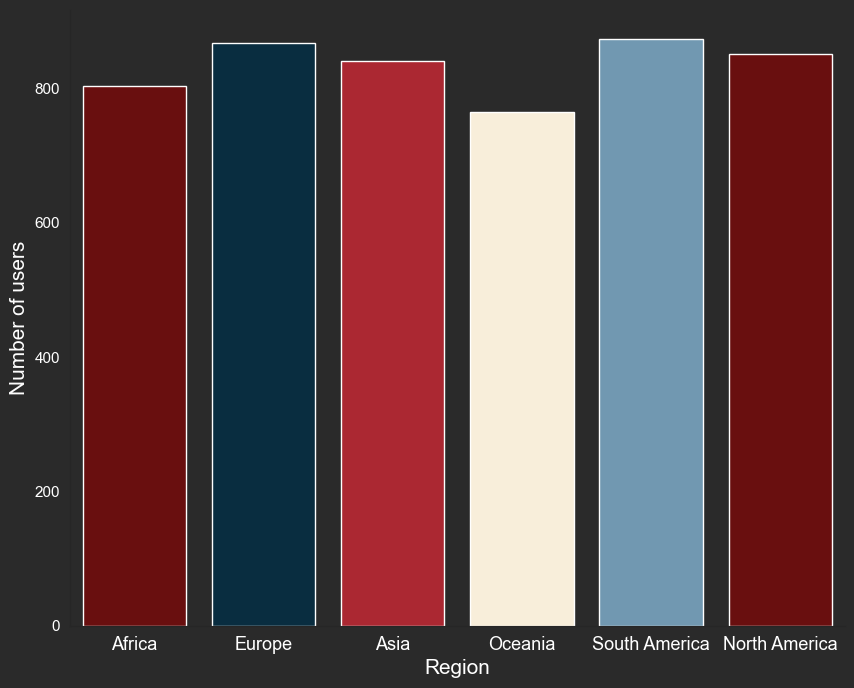

In [36]:
plt.figure(figsize=(10, 8))
ax=sns.countplot(data=data , x='region',palette=color)
sns.set_style("white", {
    'axes.facecolor': '#2a2a2a',
    'figure.facecolor': '#2a2a2a'
})

ax.set_xlabel('Region', color='white', fontsize=15)
ax.set_ylabel('Number of users', color='white', fontsize=15)
ax.tick_params(colors='white')
plt.xticks(fontsize=13)
plt.yticks(fontsize=11)
sns.despine()
plt.savefig('region_dist1.png')
plt.show()

C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\216046674.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(data=data ,x='age_group',y='watch_hours',ci=None,palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\216046674.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=data ,x='age_group',y='watch_hours',ci=None,palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\216046674.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(data=data ,x='age_group',y='watch_hours',ci=None,palette=color)


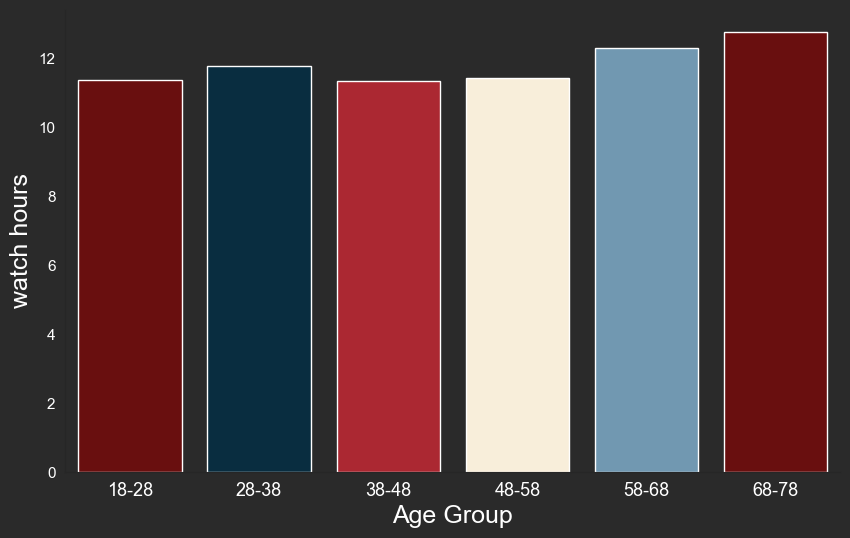

In [31]:
plt.figure(figsize=(10, 6))
bins=[18,28,38,48,58,68,78]
labels=['18-28','28-38','38-48','48-58','58-68','68-78']

data['age_group']=pd.cut(data['age'],bins=bins,labels=labels)
#This splits the age column into ranges and saves the result as a new column age_group.

ax=sns.barplot(data=data ,x='age_group',y='watch_hours',ci=None,palette=color)
sns.set_style("white", {
    'axes.facecolor': '#2a2a2a',
    'figure.facecolor': '#2a2a2a'
})

ax.set_xlabel('Age Group', color='white', fontsize=18)
ax.set_ylabel('watch hours', color='white', fontsize=18)
ax.tick_params(colors='white')
plt.xticks(fontsize=13)
plt.yticks(fontsize=11)
sns.despine()
plt.savefig('age_vs_watchhr.png')
plt.show()

C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\4152695236.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax=sns.countplot(data=data , x='age_group' ,hue='subscription_type',palette=color)


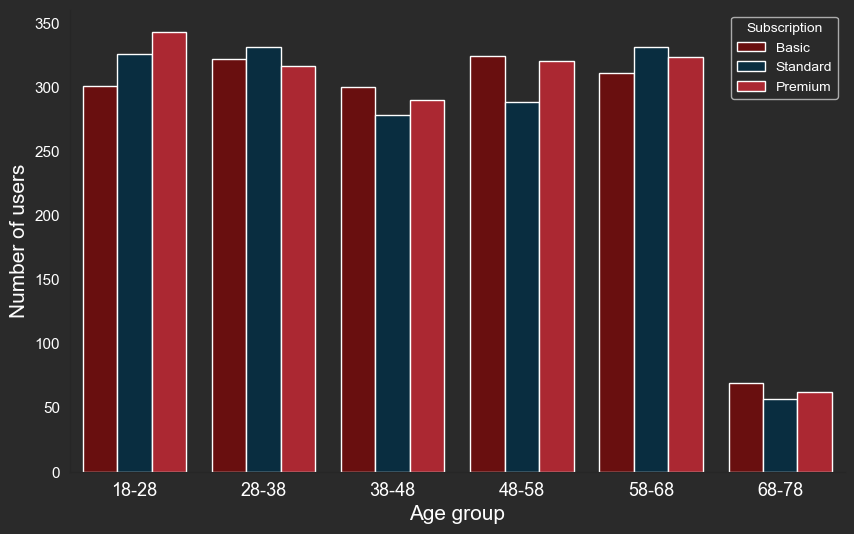

In [34]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=data , x='age_group' ,hue='subscription_type',palette=color)
sns.set_style("white", {
    'axes.facecolor': '#2a2a2a',
    'figure.facecolor': '#2a2a2a'
})

ax.set_xlabel('Age group', color='white', fontsize=15)
ax.set_ylabel('Number of users', color='white', fontsize=15)
ax.tick_params(colors='white')
plt.xticks(fontsize=13)
plt.yticks(fontsize=11)

legend=ax.legend(title='Subscription',labelcolor='white')
legend.get_title().set_color('white')
sns.despine()
plt.savefig('age_vs_user1.png')
plt.show()

C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\1698225977.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(data=data , x='age_group',y='avg_watch_time_per_day',ci=None,palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\1698225977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=data , x='age_group',y='avg_watch_time_per_day',ci=None,palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\1698225977.py:2: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(data=data , x='age_group',y='avg_watch_time_per_day',ci=None,palette=color)


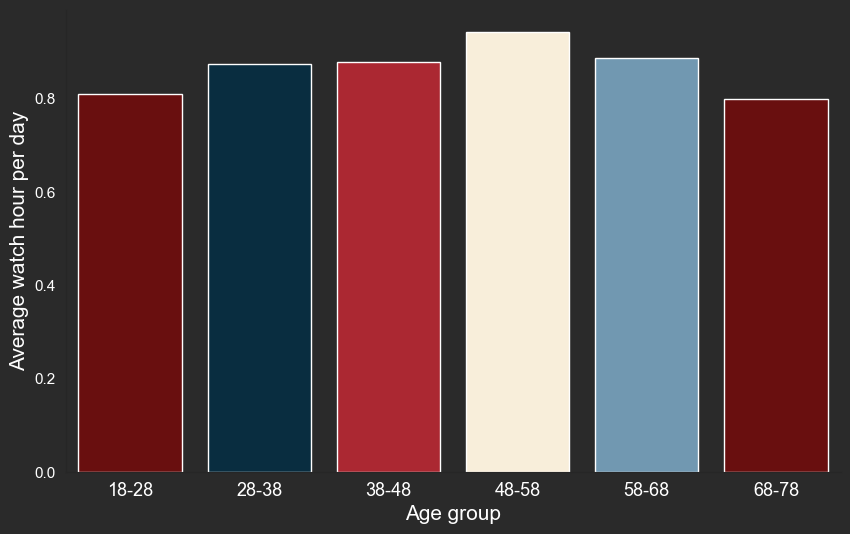

In [33]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=data , x='age_group',y='avg_watch_time_per_day',ci=None,palette=color)
sns.set_style("white", {
    'axes.facecolor': '#2a2a2a',
    'figure.facecolor': '#2a2a2a'
})

ax.set_xlabel('Age group', color='white', fontsize=15)
ax.set_ylabel('Average watch hour per day', color='white', fontsize=15)
ax.tick_params(colors='white')
plt.xticks(fontsize=13)
plt.yticks(fontsize=11)
sns.despine()
plt.savefig('age_vs_perdaywatch1.png')
plt.show()

C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\203403720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=data , x='age_group',y='number_of_profiles',palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\203403720.py:2: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax=sns.boxplot(data=data , x='age_group',y='number_of_profiles',palette=color)


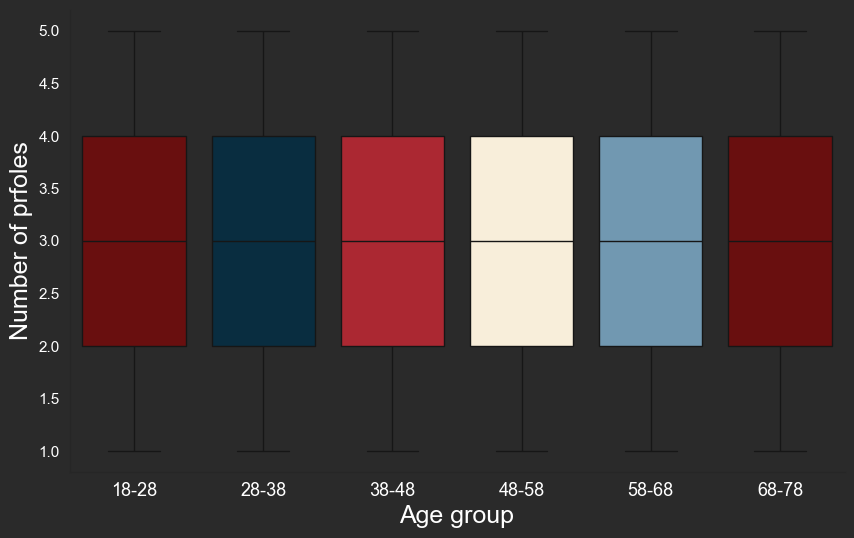

In [32]:
plt.figure(figsize=(10, 6))
ax=sns.boxplot(data=data , x='age_group',y='number_of_profiles',palette=color)
sns.set_style("white", {
    'axes.facecolor': '#2a2a2a',
    'figure.facecolor': '#2a2a2a'
})

ax.set_xlabel('Age group', color='white', fontsize=18)
ax.set_ylabel('Number of prfoles', color='white', fontsize=18)
ax.tick_params(colors='white')
plt.xticks(fontsize=13)
plt.yticks(fontsize=11)
sns.despine()
plt.savefig('age_vs_profiles1.png')
plt.show()

C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\2179428085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=data , y='age',x='region',palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\2179428085.py:2: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax=sns.boxplot(data=data , y='age',x='region',palette=color)


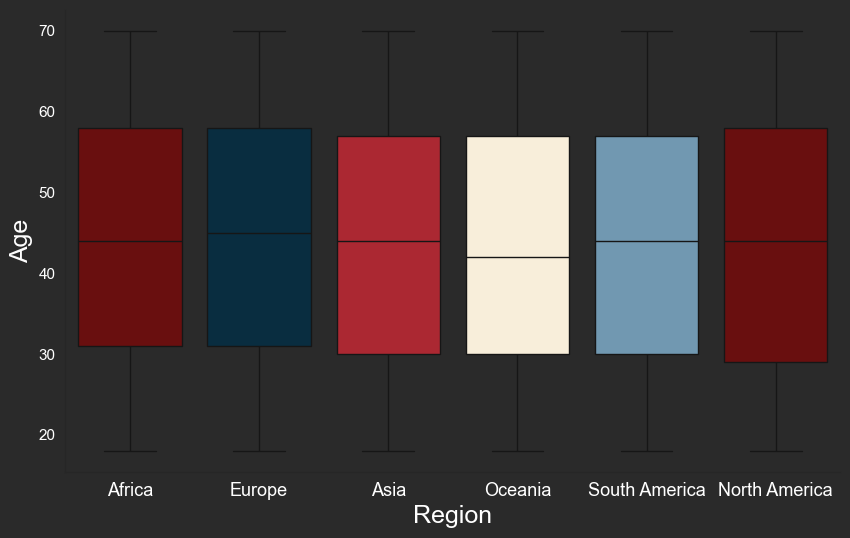

In [28]:
plt.figure(figsize=(10, 6))
ax=sns.boxplot(data=data , y='age',x='region',palette=color)
sns.set_style("white", {
    'axes.facecolor': '#2a2a2a',
    'figure.facecolor': '#2a2a2a'
})

ax.set_xlabel('Region', color='white', fontsize=18)
ax.set_ylabel('Age', color='white', fontsize=18)
ax.tick_params(colors='white')
plt.xticks(fontsize=13)
plt.yticks(fontsize=11)
sns.despine()
plt.savefig('region_vs_age1.png')
plt.show()

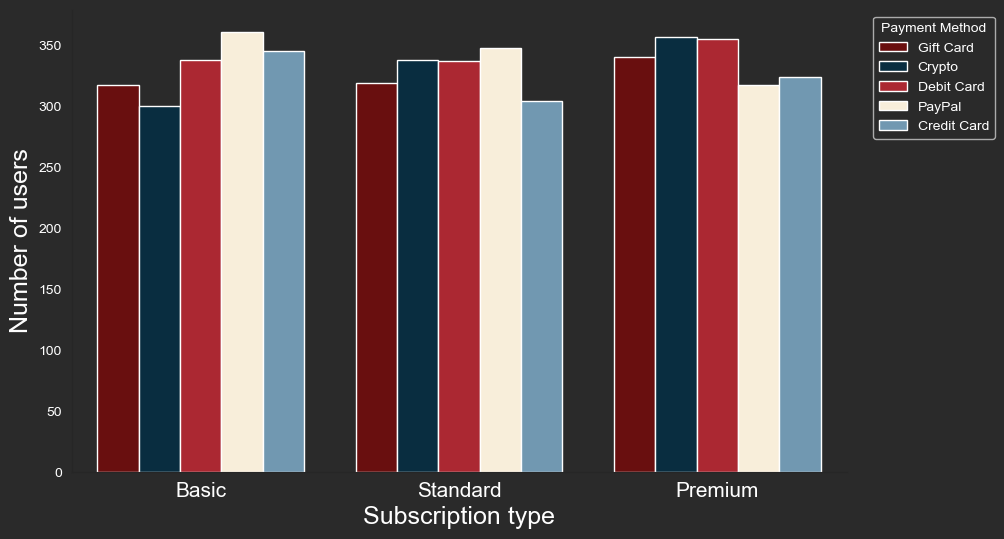

In [23]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=data , x='subscription_type',hue='payment_method',palette=color)
sns.set_style("white", {
    'axes.facecolor': '#2a2a2a',
    'figure.facecolor': '#2a2a2a'
})

ax.set_xlabel('Subscription type', color='white', fontsize=18)
ax.set_ylabel('Number of users', color='white', fontsize=18)
ax.tick_params(colors='white')
sns.despine()

plt.xticks(fontsize=15)
legend=plt.legend(title='Payment Method',bbox_to_anchor=(1.20, 1), loc='upper right',labelcolor='white')
legend.get_title().set_color('white')
plt.savefig('subscription_vs_user1.png')
plt.show()

C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\3825261213.py:2: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(data=data , hue='age_group',x='favorite_genre',palette=color)


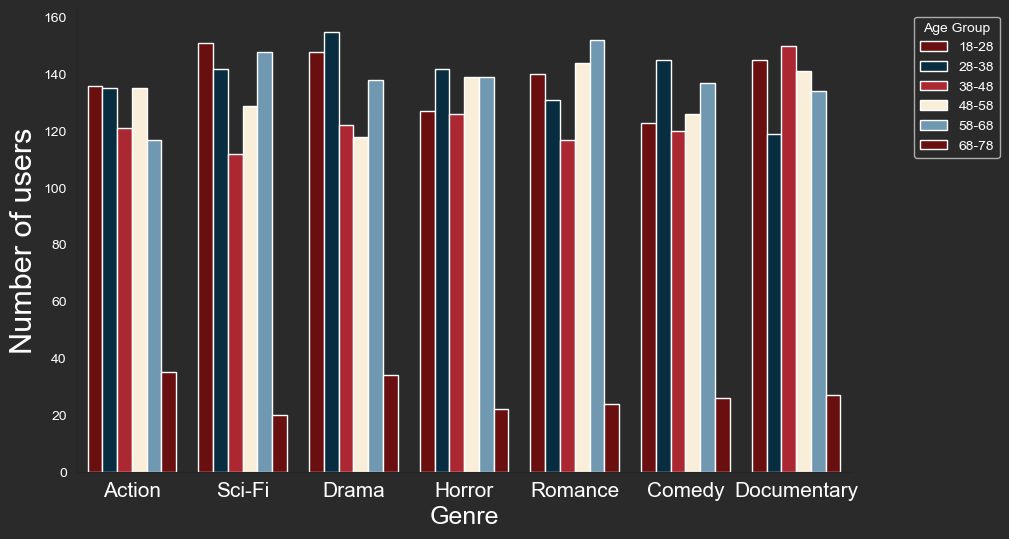

In [15]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=data , hue='age_group',x='favorite_genre',palette=color)
sns.set_style("white", {
    'axes.facecolor': '#2a2a2a',
    'figure.facecolor': '#2a2a2a'
})

ax.set_xlabel('Genre', color='white', fontsize=18)
ax.set_ylabel('Number of users', color='white', fontsize=22)
ax.tick_params(colors='white')
sns.despine()
plt.xticks(fontsize=15)
legend=plt.legend(title='Age Group',bbox_to_anchor=(1.20, 1), loc='upper right',labelcolor='white')
legend.get_title().set_color('white')
plt.savefig('genre_vs_user2.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\931834975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=data , x='churned',y='last_login_days',palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\931834975.py:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax=sns.boxplot(data=data , x='churned',y='last_login_days',palette=color)


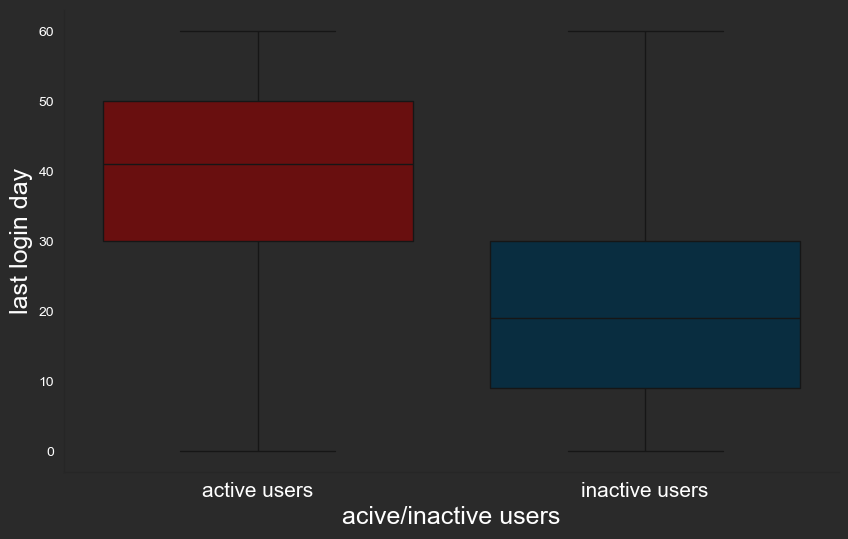

In [21]:
churn={
    0:'inactive users',
    1:'active users'}
data['churned']=data['churned'].map(churn)

plt.figure(figsize=(10, 6))
ax=sns.boxplot(data=data , x='churned',y='last_login_days',palette=color)
sns.set_style("white", {
    'axes.facecolor': '#2a2a2a',
    'figure.facecolor': '#2a2a2a'
})

ax.set_xlabel('acive/inactive users', color='white', fontsize=18)
ax.set_ylabel('last login day', color='white', fontsize=18)
ax.tick_params(colors='white')
plt.xticks(fontsize=15)

sns.despine()
plt.savefig('acitvityofuser_lastlogin1.png')
plt.show()

C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\288156439.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=data , x='churned',palette=color)
C:\Users\ABC\AppData\Local\Temp\ipykernel_12532\288156439.py:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax=sns.countplot(data=data , x='churned',palette=color)


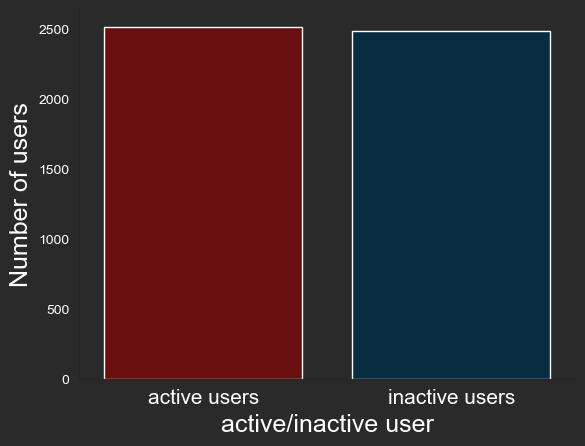

In [22]:

ax=sns.countplot(data=data , x='churned',palette=color)
sns.set_style("white", {
    'axes.facecolor': '#2a2a2a',
    'figure.facecolor': '#2a2a2a'
})

ax.set_xlabel('active/inactive user', color='white', fontsize=18)
ax.set_ylabel('Number of users', color='white', fontsize=18)
ax.tick_params(colors='white')
plt.xticks(fontsize=15)

sns.despine()
plt.savefig('activity_vs_user1.png')
plt.show()